<a href="https://colab.research.google.com/github/praveen1608/Praveen-Reddy_INFO5731_Spring2024/blob/main/Kadasani_PraveenReddy_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
import pandas as pd   # importing the libraries
import requests
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Load dataset
url = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/train_eval.csv"   # URL of CSV file

data = requests.get(url)
data_str = StringIO(data.text)

df = pd.read_csv(data_str)
df.head()

,Document ID,Cleaned Reviews,sentiment
0,1,killer flower moon western crime drama film co...,negative
1,2,film warrant long runtim epic like lawrenc ara...,negative
2,3,martin scorses follow sloppi irishman anoth ex...,negative
3,4,obvious isnt bad amaz director interest stori ...,negative
4,5,im diehard martin scorses fan deep appreci mov...,neutral


In [2]:
# Text representation
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # using TF-IDF for text representation
tfidf_features = tfidf_vectorizer.fit_transform(df['Cleaned Reviews'])

# Using LDA Topic Modeling
num_topics = 10       # no.of topics or clusters
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(tfidf_features)

In [3]:
# To get top topics or clusters
def get_top_words(model, feature_names, n_top_words):
    top_words_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_list.append(top_words)
    return top_words_list

In [4]:
# Displaying top words for each topic or cluster
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = get_top_words(lda_model, tfidf_feature_names, n_top_words=10)

for i, topic_words in enumerate(top_words_per_topic):
    print(f"Topic {i+1}: {' '.join(topic_words)}")

Topic 1: incred humor day number sever trailer cinema stori movi award
Topic 2: etc run histori along director get could terribl cameo shorter
Topic 3: king emmet scorses hale charact narr third osag song schoonmak
Topic 4: stori busker court hour natur histor killer moon great could
Topic 5: cinema mini far abl cold view howev seri take home
Topic 6: mr sensit craft book movi mere long score show like
Topic 7: film love ernest osag win endless molli man oscar tribe
Topic 8: stori film repetit whole betray gladston build well seem charact
Topic 9: realli stori movi interest love like didnt honor much slow
Topic 10: old excess earli niro de fan film play believ thrill


In [5]:
import numpy as np

# Displaying representative documents for each topic
def get_rep_docs(lda_model, tfidf_features, df, num_rep_docs=5):
    rep_docs = []
    # Convert tfidf_features to a dense array
    tfidf_dense = tfidf_features.toarray()
    for topic_idx, topic in enumerate(lda_model.components_):
        # Get indices based on TF-IDF scores
        top_doc_indices = np.argsort(tfidf_dense[:, topic_idx])[::-1][:num_rep_docs]
        top_docs = df.iloc[top_doc_indices]['Cleaned Reviews']
        rep_docs.append(top_docs.values)
    return rep_docs

rep_docs_per_topic = get_rep_docs(lda_model, tfidf_features, df)



In [6]:
# Print summary for each topic
for i, (topic_words, rep_docs) in enumerate(zip(top_words_per_topic, rep_docs_per_topic)):
    print(f"Topic {i+1}:")
    print("Top words:", ', '.join(topic_words))
    print("Representative documents:")
    for j, doc in enumerate(rep_docs):
        print(f"Document {j+1}: {doc}")
    print()


Topic 1:
Top words: incred, humor, day, number, sever, trailer, cinema, stori, movi, award
Representative documents:
Document 1: sorri say far long cinema found irishman far long well howev abl watch home day one made much easier view experi enabl take break need abl realli enjoy irishman would felt similar circumst realli tough watch cinema tri avoid look watch movi couldnt seem help one occas see minut past sinc last peek realis wasnt help much allit bore cinema film someth comfort home youv got option treat like mini seri mini seri tv would fantast movi cinema make extrem tax view experiencei must also admit start go nasti cold film might affect feel toward howev went feel perfectli well far goe came quit sickli movi evid long enough someth like cold take hold
Document 2: sorri say far long cinema found irishman far long well howev abl watch home day one made much easier view experi enabl take break need abl realli enjoy irishman would felt similar circumst realli tough watch cinema

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [7]:
#(1)
'''
Features which were related to text content are very crucial in classification of sentiment.
Most commonly used features are Bag of words(BoW), Term Frequency-Inverse Document Frequency(TF-IDF)
and Word Embeddings. Among these I choose TF-IDF because , it helps us in capturing word importance
and are most effective for sentiment analysis.
'''

'\nFeatures which were related to text content are very crucial in classification of sentiment.\nMost commonly used features are Bag of words(BoW), Term Frequency-Inverse Document Frequency(TF-IDF)\nand Word Embeddings. Among these I choose TF-IDF because , it helps us in capturing word importance\nand are most effective for sentiment analysis.\n'

In [8]:
#Write your code here

df['sentiment'].value_counts()

sentiment
negative    840
neutral     160
Name: count, dtype: int64

In [9]:
# importing the required libarries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned Reviews'], df['sentiment'], test_size=0.2, random_state=42)


In [11]:
# Vectorizing the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
#(2) Building the classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

In [13]:
#(3) Evaluating the models by using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)   # 5 fold cross-validation
    print(f"Model: {model_name}")
    print("Cross-validation scores:", scores)
    print("Mean CV accuracy:", scores.mean())

    model.fit(X_train_tfidf, y_train)     # Training the model using training data

    y_pred = model.predict(X_test_tfidf)   # Testing the model with test data

    # Calculate  the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Printing the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()

Model: Logistic Regression
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Model: Support Vector Machine
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [14]:
# Write your code here

import pandas as pd
import requests
from io import StringIO  # Import StringIO from io module

# Load dataset
url_test = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/test.csv"  # Corrected URL of CSV file

data_test = requests.get(url_test)
data_str = StringIO(data_test.text)

df_test = pd.read_csv(data_str)
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
import pandas as pd
import requests
from io import StringIO  # Import StringIO from io module

# Load dataset
url_train = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/train.csv"  # Corrected URL of CSV file

data_train = requests.get(url_train)
data_str = StringIO(data_train.text)

df_train = pd.read_csv(data_str)

df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# (1) Explatory Data Analysis
df_test.describe()  # EDA of test data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [17]:
df_train.describe()  # EDA of training data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


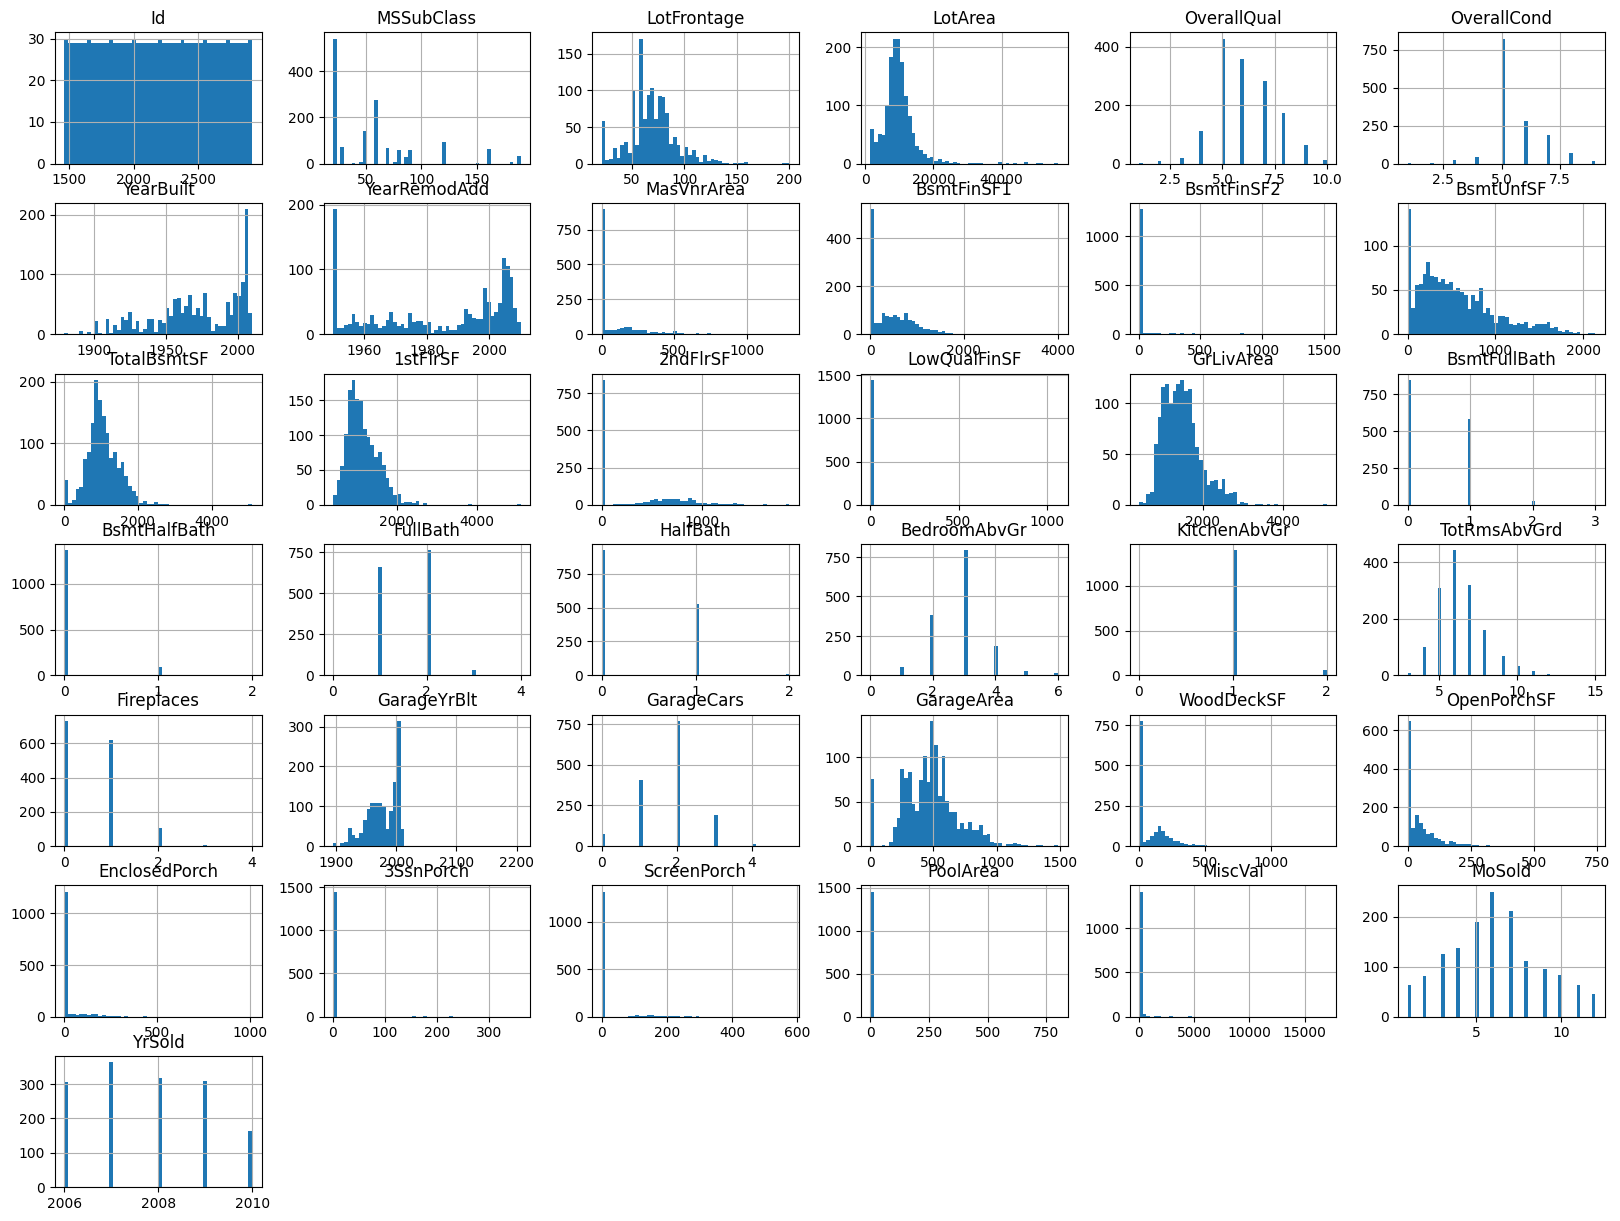

In [18]:
# Ploting the histograms of test data
%matplotlib inline
import matplotlib.pyplot as plt
df_test.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

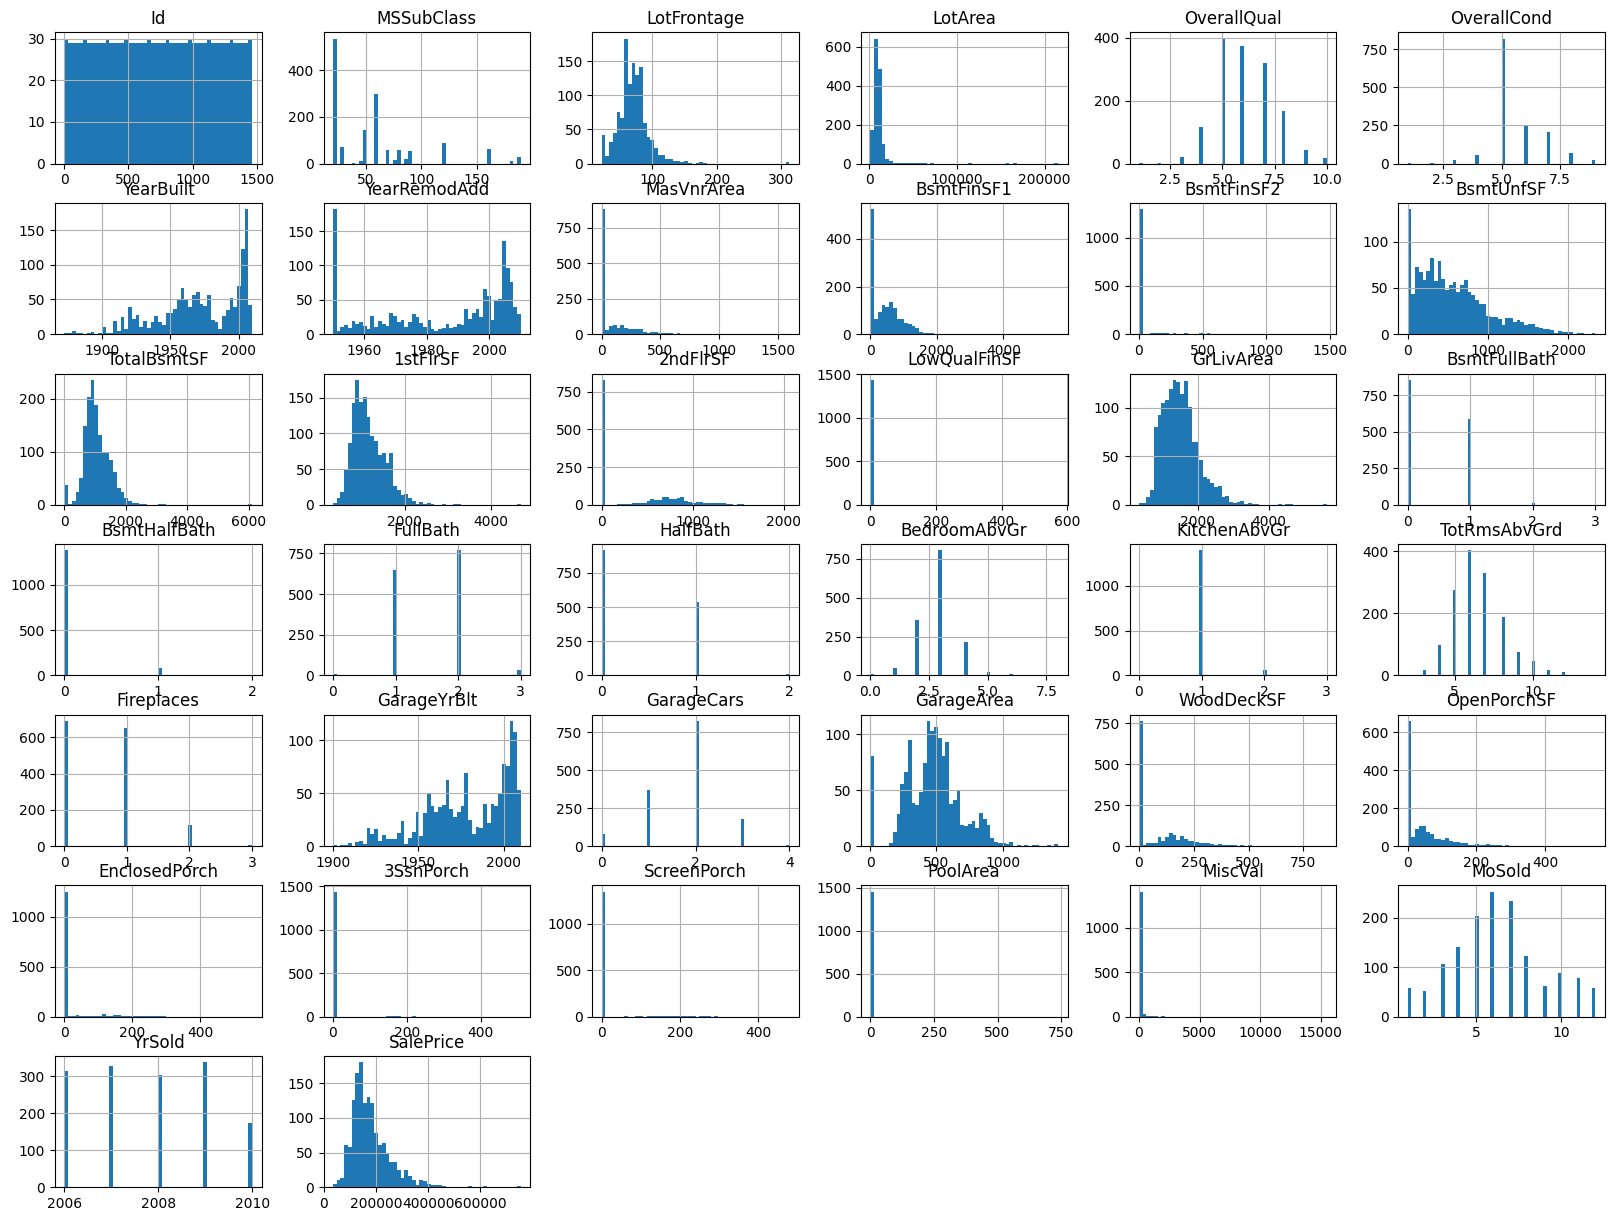

In [19]:
# Ploting the histograms of training data
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [20]:
# Importing the rwquired libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data cleaning
missing_values = df_train.isnull().sum()           # Checking for missing values
print("No.of Missing Values in each Column:")
print(missing_values[missing_values > 0])

No.of Missing Values in each Column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


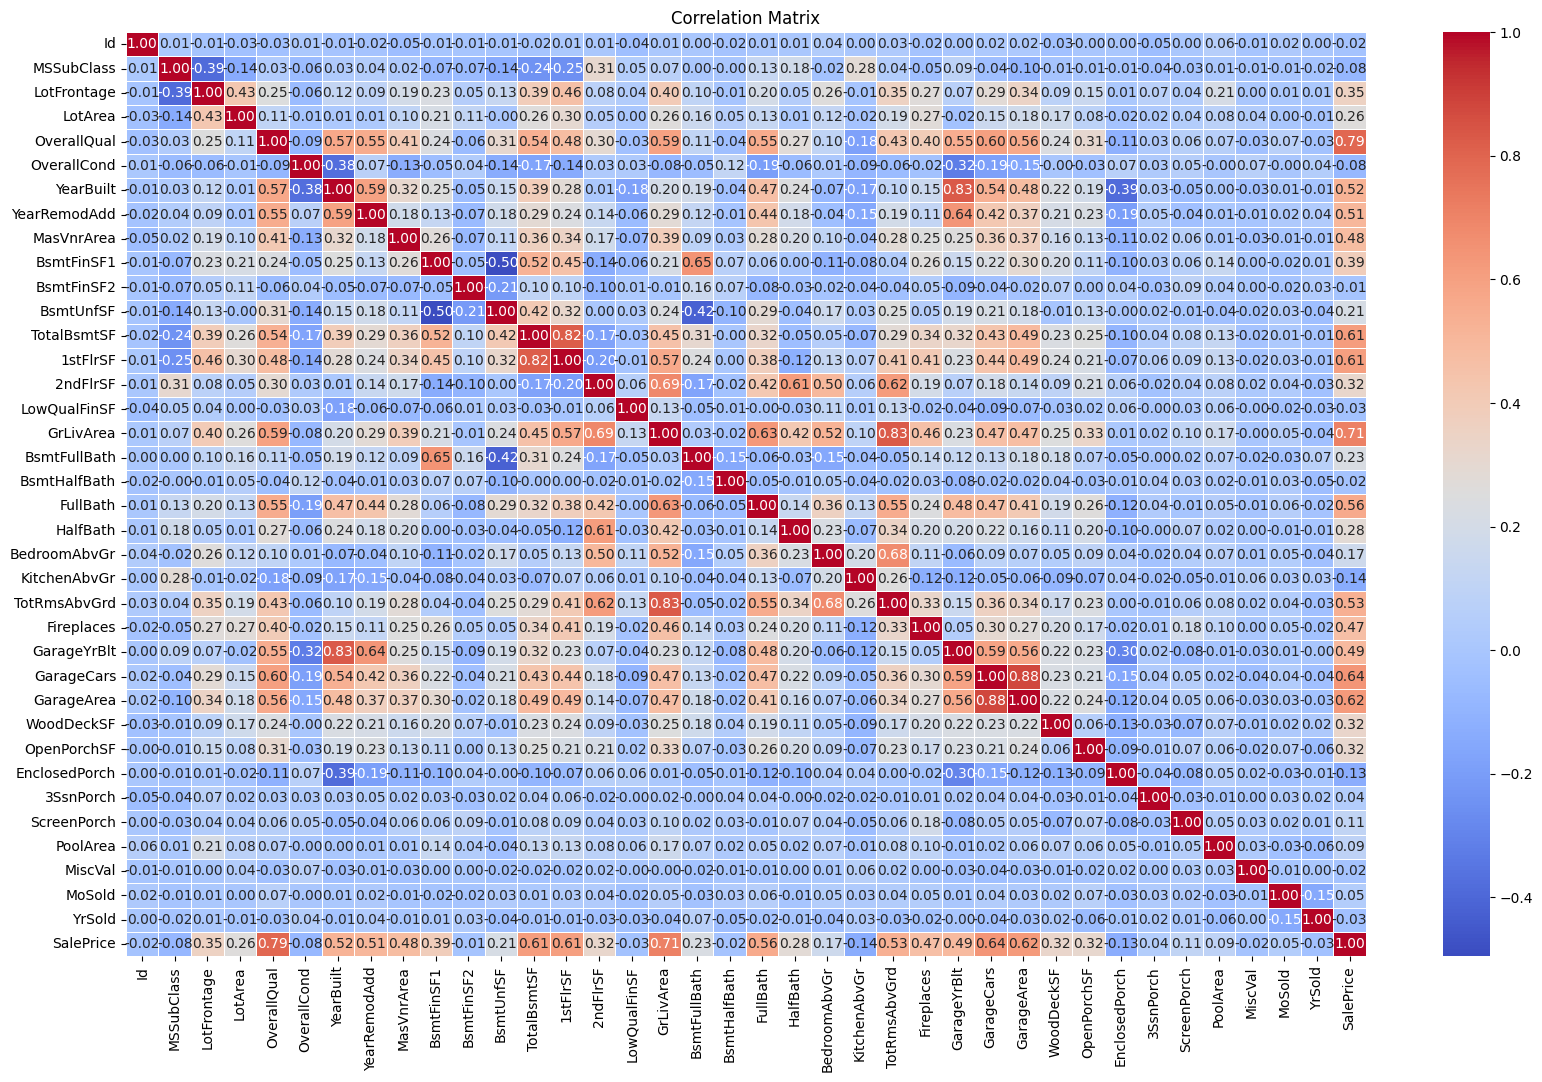


Correlation Coefficients with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128

In [21]:
numeric_cols = df_train.select_dtypes(include=['number']).columns        # Selecting only numerical columns for correlation analysis
df_numeric = df_train[numeric_cols]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Ploting heatmap of correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Get correlation coefficients with the target variable (SalePrice)
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nCorrelation Coefficients with SalePrice:")
print(target_corr)

In [22]:
#(2) selecting features
'''
Based on the results from the above graph, I will select the below features, because of their high correlation coefficients with the sales price.
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
'''

'\nBased on the results from the above graph, I will select the below features, because of their high correlation coefficients with the sales price.\nOverallQual      0.790982\nGrLivArea        0.708624\nGarageCars       0.640409\nGarageArea       0.623431\nTotalBsmtSF      0.613581\n1stFlrSF         0.605852\nFullBath         0.560664\nTotRmsAbvGrd     0.533723\nYearBuilt        0.522897\nYearRemodAdd     0.507101\nGarageYrBlt      0.486362\nMasVnrArea       0.477493\nFireplaces       0.466929\nBsmtFinSF1       0.386420\nEnclosedPorch   -0.128578\nKitchenAbvGr    -0.135907\n'

In [23]:
#(3) developing model
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load training and testing data
url_train = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/train.csv"
url_test = "https://raw.githubusercontent.com/praveen1608/Praveen-Reddy_INFO5731_Spring2024/main/test.csv"

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# Feature selection
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'EnclosedPorch', 'KitchenAbvGr']

# Preparing data for modeling
X_train = df_train[selected_features]
y_train = df_train['SalePrice']
X_test = df_test[selected_features]


imputer_mode = SimpleImputer(strategy='most_frequent')      # Imputing missing values in training and test data
X_train_imputed = pd.DataFrame(imputer_mode.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer_mode.transform(X_test), columns=X_test.columns)


print("Missing values in training data after imputation:")   # Verify for missing values after imputation
print(X_train_imputed.isnull().sum())

# Build and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)


y_train_pred = model.predict(X_train_imputed)   # Prediction

#(4) Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = (train_mse) ** 0.5
train_r2 = r2_score(y_train, y_train_pred)


# Predict on test set
test_predictions = model.predict(X_test_imputed)

# saving predictions to CSV file
df_test['PredictedSalePrice'] = test_predictions
df_test[['Id', 'PredictedSalePrice']].to_csv('predictions.csv', index=False)


Missing values in training data after imputation:
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt      0
MasVnrArea       0
Fireplaces       0
BsmtFinSF1       0
EnclosedPorch    0
KitchenAbvGr     0
dtype: int64


In [24]:
# printing the results of evaluation
print("Training Set Metrics:")
print(f"Mean Squared Error: {train_mse}")
print(f"Root Mean Squared Error: {train_rmse}")
print(f"R-squared: {train_r2}")

Training Set Metrics:
Mean Squared Error: 1299217659.1188965
Root Mean Squared Error: 36044.66200589064
R-squared: 0.7939969539906593


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [25]:
# Write your code here
#(1)
'''
Here I'm using the BERT (Bidirectional Encoder Representations from Transformers) model for sentiment analysis, which is a pre trained language model from Hugging Face repository.
It is developed by Google AI to handle different natural language understanding tasks, which includes sentiment analysis. This model was pre trained on a large corpus of text data
from BooksCorpus with 800 million words and English wikipedia with 2500 million words. It has 110 million parameters, and its advanced versions has even more. This model can be fine
tuned for sentiment analysis, anyways here we use BERT in zero-shot setting which means we won't fine tune it.
'''


"\nHere I'm using the BERT (Bidirectional Encoder Representations from Transformers) model for sentiment analysis, which is a pre trained language model from Hugging Face repository.\nIt is developed by Google AI to handle different natural language understanding tasks, which includes sentiment analysis. This model was pre trained on a large corpus of text data \nfrom BooksCorpus with 800 million words and English wikipedia with 2500 million words. It has 110 million parameters, and its advanced versions has even more. This model can be fine\ntuned for sentiment analysis, anyways here we use BERT in zero-shot setting which means we won't fine tune it.\n"

In [26]:
!pip install transformers

In [34]:
#(2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch


X = df['Cleaned Reviews']
y = df['sentiment']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the text data
X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt', max_length=256)
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt', max_length=256)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], torch.tensor(y_test, dtype=torch.long))

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# Evaluate the model
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        predictions.extend(predicted_labels.cpu().numpy())

# Calculate key metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f' The Accuracy: {accuracy:.4f}')
print(f'The Precision: {precision:.4f}')
print(f'The Recall: {recall:.4f}')
print(f'The F1 Score: {f1:.4f}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 The Accuracy: 0.8500
The Precision: 0.0000
The Recall: 0.0000
The F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
'''
Advantages of BERT model-

It captures the contextual information from the text by allowing it to understand nuances and context in sentiment analysis. It was pre trained on huge text corpus,
it understands natural language patterns. It can be fine tuned for specific tasks, though it was effective in zero-shot and few shot learning settings.

Disadvantages of BERT-

It requires a significant computational resources for large number of parameters. For large versions storage and memory requirements are significant. Fine tuning is a
time consuming task.

Challenges that I encountered while using the BERT model without tuning gives results very poorly. By using tuning it got better.

'''

'\nAdvantages of BERT model-\n\nIt captures the contextual information from the text by allowing it to understand nuances and context in sentiment analysis. It was pre trained on huge text corpus, \nit understands natural language patterns. It can be fine tuned for specific tasks, though it was effective in zero-shot and few shot learning settings.\n\nDisadvantages of BERT-\n\nIt requires a significant computational resources for large number of parameters. For large versions storage and memory requirements are significant. Fine tuning is a\ntime consuming task. \n\nChallenges that I encountered while using the BERT model without tuning gives results very poorly. By using tuning it got better.\n\n'